In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [143]:
seq_df = pd.read_csv("data/sequencesData-JanToMarch.csv")

In [144]:
seq_df

,Accession,SRA_Accession,Release_Date,Species,Genus,Family,Length,Sequence_Type,Nuc_Completeness,Genotype,Segment,Authors,Publications,Geo_Location,USA,Host,Isolation_Source,Collection_Date,BioSample,GenBank_Title
0,MT233526,"SRR11409417,SRR11393704",2020-03-26T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29847,GenBank,complete,NaN,NaN,"Thornburg,N., Bradford,R., Rashid,S., Flores,B...",NaN,USA: WA,WA,Homo sapiens,oronasopharynx,1/19/2020,SAMN14384141,Severe acute respiratory syndrome coronavirus ...
1,MT246667,"SRR11409417,SRR11393704",2020-03-26T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29867,GenBank,complete,NaN,NaN,"Thornburg,N., Bradford,R., Rashid,S., Flores,B...",NaN,USA: WA,WA,Homo sapiens,oronasopharynx,1/19/2020,SAMN14384141,Severe acute respiratory syndrome coronavirus ...
2,MT106052,NaN,2020-02-24T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29882,GenBank,complete,NaN,NaN,"Queen,K., Uehara,A., Zhang,J., Li,Y., Tao,Y., ...",NaN,USA: CA,CA,Homo sapiens,oronasopharynx,2/6/2020,NaN,Severe acute respiratory syndrome coronavirus ...
3,MT106053,NaN,2020-02-24T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29882,GenBank,complete,NaN,NaN,"Queen,K., Uehara,A., Zhang,J., Li,Y., Tao,Y., ...",NaN,USA: CA,CA,Homo sapiens,oronasopharynx,2/10/2020,NaN,Severe acute respiratory syndrome coronavirus ...
4,MT044258,NaN,2020-02-12T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29858,GenBank,complete,NaN,NaN,"Zhang,J., Queen,K., Li,Y., Tao,Y., Uehara,A., ...",NaN,USA: CA,CA,Homo sapiens,oronasopharynx,1/27/2020,NaN,Severe acute respiratory syndrome coronavirus ...
5,MT039887,NaN,2020-02-11T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29879,GenBank,complete,NaN,NaN,"Zhang,J., Uehara,A., Queen,K., Li,Y., Tao,Y., ...",NaN,USA: WI,WI,Homo sapiens,oronasopharynx,1/31/2020,NaN,Severe acute respiratory syndrome coronavirus ...
6,MT039888,NaN,2020-02-11T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29882,GenBank,complete,NaN,NaN,"Paden,C.R., Zhang,J., Queen,K., Li,Y., Tao,Y.,...",NaN,USA: MA,MA,Homo sapiens,oronasopharynx,1/29/2020,NaN,Severe acute respiratory syndrome coronavirus ...
7,MT027062,NaN,2020-02-07T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29882,GenBank,complete,NaN,NaN,"Queen,K., Zhang,J., Li,Y., Tao,Y., Uehara,A., ...",NaN,USA: CA,CA,Homo sapiens,oronasopharynx,1/29/2020,NaN,Severe acute respiratory syndrome coronavirus ...
8,MT027063,NaN,2020-02-07T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29882,GenBank,complete,NaN,NaN,"Queen,K., Zhang,J., Li,Y., Tao,Y., Uehara,A., ...",NaN,USA: CA,CA,Homo sapiens,oronasopharynx,1/29/2020,NaN,Severe acute respiratory syndrome coronavirus ...
9,MT027064,NaN,2020-02-07T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29882,GenBank,complete,NaN,NaN,"Tao,Y., Queen,K., Zhang,J., Li,Y., Uehara,A., ...",NaN,USA: CA,CA,Homo sapiens,oronasopharynx,1/29/2020,NaN,Severe acute respiratory syndrome coronavirus ...


In [145]:
seq_df['Geo_Location'].unique()

array(['USA: WA', 'USA: CA', 'USA: WI', 'USA: MA'], dtype=object)

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt


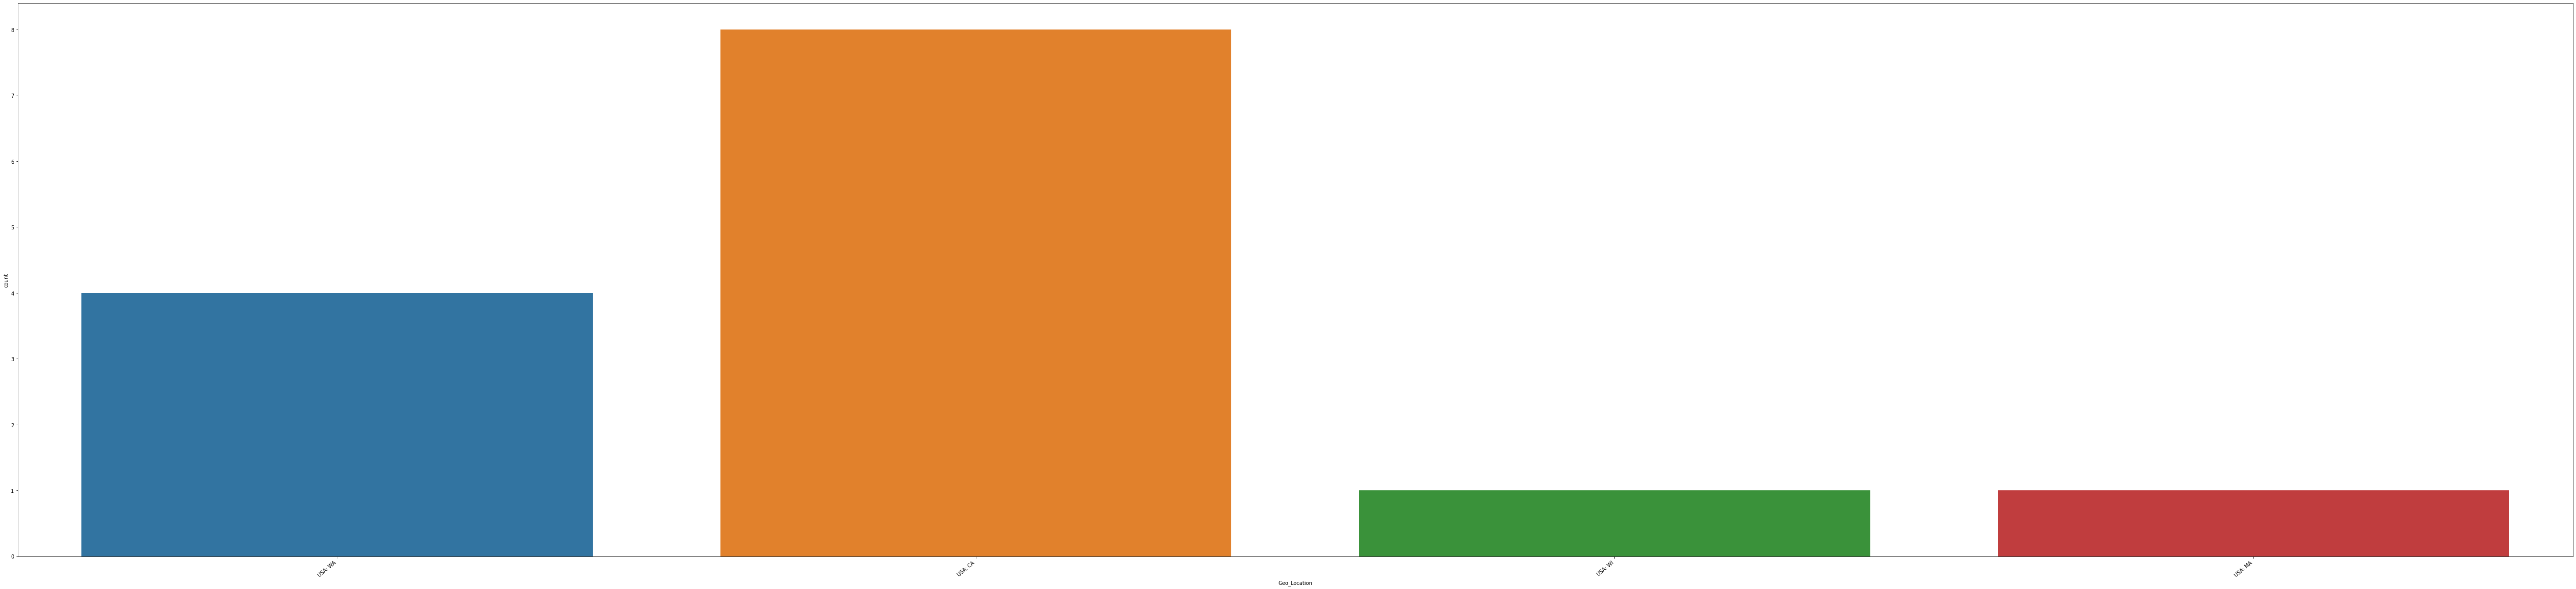

In [148]:
plt.figure(figsize=(90,20))
plot=sns.countplot(seq_df['Geo_Location'])
plot.set_xticklabels(plot.get_xticklabels(),rotation=40, ha="right")
plt.show()

In [149]:
accession=[]
accession=seq_df['Accession']

In [150]:
len(accession)

14

In [151]:
from Bio import Entrez

In [152]:
Entrez.email = " pradnyanim18@gmail.com"
refseq_handle = open("data/ref_seq.gb","w")

handle= Entrez.efetch(db='nuccore', id='NC_045512', rettype='gb', retmode="text")
record= handle.read()
refseq_handle.write(record)
refseq_handle.close()

In [153]:
Entrez.email = "pradnyanim18@gmail.com"
epost_handle = Entrez.epost(db = "nuccore", id=",".join(accession))

In [154]:
search_results = Entrez.read(epost_handle)
search_results

{'QueryKey': '1', 'WebEnv': 'MCID_5fd85c8f3197f60f896c50e7'}

In [155]:
webenv = search_results["WebEnv"]
query_key=search_results["QueryKey"]

In [168]:
batch_size=50
out_handle=open("SARS_COV-2_Corona.gb","w")
count=len(accession)

for start in range(0, count, batch_size):
    end=min(count, start + batch_size)
    print("Downloading records %i to %i" % (start + 1, end) + '...')
    efetch_handle = Entrez.efetch(
            db="nuccore",
            rettype="gb",
            retmode="text",
            retstart=start, 
            retmax=batch_size,
            webenv=webenv,
            query_key=query_key,
            )
    records = efetch_handle.read()
    efetch_handle.close()
    out_handle.write(records)
    
out_handle.close()
print('All done')

All done


In [169]:
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord

In [170]:
CoV_oro = SeqIO.parse('data/output/SARS_COV-2_Corona.gb', 'genbank')

In [171]:
CoV_oro

In [172]:
count = 0

for record in CoV_oro:
    count+=1
count

14

In [173]:
ref_seq = SeqIO.read('data/ref_seq.gb', 'genbank')
ref_seq

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='NC_045512.2', name='NC_045512', description='Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=['BioProject:PRJNA485481'])

In [174]:
features=ref_seq.features
features

[SeqFeature(FeatureLocation(ExactPosition(0), ExactPosition(29903), strand=1), type='source'),
 SeqFeature(FeatureLocation(ExactPosition(0), ExactPosition(265), strand=1), type="5'UTR"),
 SeqFeature(FeatureLocation(ExactPosition(265), ExactPosition(21555), strand=1), type='gene'),
 SeqFeature(CompoundLocation([FeatureLocation(ExactPosition(265), ExactPosition(13468), strand=1), FeatureLocation(ExactPosition(13467), ExactPosition(21555), strand=1)], 'join'), type='CDS', location_operator='join'),
 SeqFeature(FeatureLocation(ExactPosition(265), ExactPosition(805), strand=1), type='mat_peptide'),
 SeqFeature(FeatureLocation(ExactPosition(805), ExactPosition(2719), strand=1), type='mat_peptide'),
 SeqFeature(FeatureLocation(ExactPosition(2719), ExactPosition(8554), strand=1), type='mat_peptide'),
 SeqFeature(FeatureLocation(ExactPosition(8554), ExactPosition(10054), strand=1), type='mat_peptide'),
 SeqFeature(FeatureLocation(ExactPosition(10054), ExactPosition(10972), strand=1), type='mat_

In [175]:

features=ref_seq.features

features_genes = []

for feature in features:
    if feature.type =='gene':
        features_genes.append(feature)
features_genes
# for feature in features_genes:
#     print(feature.qualifiers['gene'])

[SeqFeature(FeatureLocation(ExactPosition(265), ExactPosition(21555), strand=1), type='gene'),
 SeqFeature(FeatureLocation(ExactPosition(21562), ExactPosition(25384), strand=1), type='gene'),
 SeqFeature(FeatureLocation(ExactPosition(25392), ExactPosition(26220), strand=1), type='gene'),
 SeqFeature(FeatureLocation(ExactPosition(26244), ExactPosition(26472), strand=1), type='gene'),
 SeqFeature(FeatureLocation(ExactPosition(26522), ExactPosition(27191), strand=1), type='gene'),
 SeqFeature(FeatureLocation(ExactPosition(27201), ExactPosition(27387), strand=1), type='gene'),
 SeqFeature(FeatureLocation(ExactPosition(27393), ExactPosition(27759), strand=1), type='gene'),
 SeqFeature(FeatureLocation(ExactPosition(27755), ExactPosition(27887), strand=1), type='gene'),
 SeqFeature(FeatureLocation(ExactPosition(27893), ExactPosition(28259), strand=1), type='gene'),
 SeqFeature(FeatureLocation(ExactPosition(28273), ExactPosition(29533), strand=1), type='gene'),
 SeqFeature(FeatureLocation(Exac

In [176]:

for feature in features_genes:
    print(feature.qualifiers['gene'])

['ORF1ab']
['S']
['ORF3a']
['E']
['M']
['ORF6']
['ORF7a']
['ORF7b']
['ORF8']
['N']
['ORF10']


In [177]:
for gene_feature in features_genes:
    if gene_feature.qualifiers['gene']==['S']:
        print(gene_feature)
        print("The S gene is " + str(len(gene_feature)) + " bases long")

type: gene
location: [21562:25384](+)
qualifiers:
    Key: db_xref, Value: ['GeneID:43740568']
    Key: gene, Value: ['S']
    Key: gene_synonym, Value: ['spike glycoprotein']
    Key: locus_tag, Value: ['GU280_gp02']

The S gene is 3822 bases long


In [178]:
S_reqs = []
CoV_oro = SeqIO.parse('data/output/SARS_COV-2_Corona.gb', 'genbank')

for record in CoV_oro:
    for feature in record.features:
        if feature.type == 'gene' and feature.qualifiers['gene'] == ['S']:
            new_rec = SeqRecord(seq = feature.extract(record.seq), id = record.id)
            S_reqs.append(new_rec)
            
print(len(S_reqs))

14


In [179]:
SeqIO.write(S_reqs, 'data/output/S/S_oro.fasta','fasta')

14

In [180]:
featues=ref_seq.features

features_mat_peptide = []

for feature in features:
    if feature.type == 'mat_peptide':
        features_mat_peptide.append(feature)
        
features_mat_peptide

[SeqFeature(FeatureLocation(ExactPosition(265), ExactPosition(805), strand=1), type='mat_peptide'),
 SeqFeature(FeatureLocation(ExactPosition(805), ExactPosition(2719), strand=1), type='mat_peptide'),
 SeqFeature(FeatureLocation(ExactPosition(2719), ExactPosition(8554), strand=1), type='mat_peptide'),
 SeqFeature(FeatureLocation(ExactPosition(8554), ExactPosition(10054), strand=1), type='mat_peptide'),
 SeqFeature(FeatureLocation(ExactPosition(10054), ExactPosition(10972), strand=1), type='mat_peptide'),
 SeqFeature(FeatureLocation(ExactPosition(10972), ExactPosition(11842), strand=1), type='mat_peptide'),
 SeqFeature(FeatureLocation(ExactPosition(11842), ExactPosition(12091), strand=1), type='mat_peptide'),
 SeqFeature(FeatureLocation(ExactPosition(12091), ExactPosition(12685), strand=1), type='mat_peptide'),
 SeqFeature(FeatureLocation(ExactPosition(12685), ExactPosition(13024), strand=1), type='mat_peptide'),
 SeqFeature(FeatureLocation(ExactPosition(13024), ExactPosition(13441), st

In [181]:
for feature in features_mat_peptide:
    if feature.type == 'mat_peptide' and feature.qualifiers['product'] == ['nsp3']:
        print(feature)
        print("The nsp3 is " + str(len(feature))+ " bases long")

type: mat_peptide
location: [2719:8554](+)
qualifiers:
    Key: gene, Value: ['ORF1ab']
    Key: locus_tag, Value: ['GU280_gp01']
    Key: note, Value: ["former nsp1; conserved domains are: N-terminal acidic (Ac), predicted phosphoesterase, papain-like proteinase, Y-domain, transmembrane domain 1 (TM1), adenosine diphosphate-ribose 1''-phosphatase (ADRP); produced by both pp1a and pp1ab"]
    Key: product, Value: ['nsp3']
    Key: protein_id, Value: ['YP_009725299.1']

The nsp3 is 5835 bases long
type: mat_peptide
location: [2719:8554](+)
qualifiers:
    Key: gene, Value: ['ORF1ab']
    Key: locus_tag, Value: ['GU280_gp01']
    Key: note, Value: ["former nsp1; conserved domains are: N-terminal acidic (Ac), predicted phosphoesterase, papain-like proteinase, Y-domain, transmembrane domain 1 (TM1), adenosine diphosphate-ribose 1''-phosphatase (ADRP); produced by both pp1a and pp1ab"]
    Key: product, Value: ['nsp3']
    Key: protein_id, Value: ['YP_009742610.1']

The nsp3 is 5835 bases l

In [182]:
ORF1ab_seqs = []
CoV_oro = SeqIO.parse('data/output/SARS_COV-2_Corona.gb', 'genbank')
mat_peptide_list = []

for record in CoV_oro:
    for feature in record.features:
        if feature.type == 'mat_peptide' and feature.qualifiers['product'] == ['nsp3']:
            if record.id not in mat_peptide_list:
                mat_peptide_list.append(record.id)
                new_rec = SeqRecord(seq = feature.extract(record.seq), id = record.id)
                ORF1ab_seqs.append(new_rec)
        
print(len(ORF1ab_seqs))

2


In [183]:
SeqIO.write(ORF1ab_seqs,'data/output/ORF1ab/ORF1ab_oro.fasta','fasta')

2

In [187]:
from Bio import AlignIO
from Bio.Align import AlignInfo

In [189]:
S_oro=AlignIO.read('data/output/alignments/clustalo-I20201215-014736-0534-48007114-p2m.clustal_num', 'clustal')
S_oro_summary_align = AlignInfo.SummaryInfo(S_oro)

In [190]:
S_oro_summary_align.dumb_consensus()

Seq('ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTT...TAA')

In [192]:
pip install scikit-bio

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for scikit-bio: filename=scikit_bio-0.5.6-cp38-cp38-win_amd64.whl size=1040245 sha256=75531ac0f3fce6f124627f44068ee0575c40665d25a3a518b602ad999c61911d
  Stored in directory: c:\users\pratik\appdata\local\pip\cache\wheels\12\98\31\91f76b847b1abdcca8763a3e180b9c820e8086493b60919ffa
  Created wheel for hdmedians: filename=hdmedians-0.14.1-cp38-cp38-win_amd64.whl size=113940 sha256=dfdbcd887d9b73cdc3c6116032fdaf51353d75a94e112fe33b4e69af274df05d
  Stored in directory: c:\users\pratik\appdata\local\pip\cache\wheels\15\ed\b6\a1349234275bbd53f549e82a95078b08142988765

In [193]:
from skbio import DNA, TabularMSA

S_oro_align = AlignIO.convert('data/output/alignments/clustalo-I20201215-014736-0534-48007114-p2m.clustal_num', 'clustal','data/output/alignments/clustalo-I20201215-014736-0534-48007114-p2m.fasta','fasta' )
S_oro_align_MSA = TabularMSA.read('data/output/alignments/clustalo-I20201215-014736-0534-48007114-p2m.fasta',format='fasta', constructor=DNA)

S_oro_align_MSA.reassign_index(minter='id')
S_oro_align_MSA

TabularMSA[DNA]
-----------------------------------------------------------------------
Stats:
    sequence count: 14
    position count: 3822
-----------------------------------------------------------------------
ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTC ... GTGCTCAAAGGAGTCAAATTACATTACACATAA
ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTC ... GTGCTCAAAGGAGTCAAATTACATTACACATAA
...
ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTC ... GTGCTCAAAGGAGTCAAATTACATTACACATAA
ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTC ... GTGCTCAAAGGAGTCAAATTACATTACACATAA

In [194]:
S_oro_conserved_array = S_oro_align_MSA.conservation(degenerate_mode = 'nan', gap_mode = 'include')
S_oro_conserved_array

array([1., 1., 1., ..., 1., 1., 1.])

In [195]:
S_oro_total_conserved = (S_oro_conserved_array==1).sum()
S_oro_total_conserved

3819

In [196]:
S_oro_total_conserved/(len(S_oro_conserved_array))

0.9992150706436421

In [201]:
consensus_arr = np.array(list(str(S_oro_summary_align.dumb_consensus())))
S_oro_df = pd.DataFrame(data=consensus_arr, columns=['consesnsus base'])
S_oro_df

,consesnsus base
0,A
1,T
2,G
3,T
4,T
...,...
3817,C
3818,A
3819,T
3820,A
